In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [24]:
train_df=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
test_df=pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [25]:
train_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [26]:
test_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [27]:
train_df['date']=pd.to_datetime(train_df['date'])
test_df['date']=pd.to_datetime(test_df['date'])

In [28]:
train_df.set_index('date',inplace=True)
test_df.set_index('date',inplace=True)

In [29]:
train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [30]:
test_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [31]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [32]:
print(train_df.isnull().sum())

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [34]:
print(train_df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


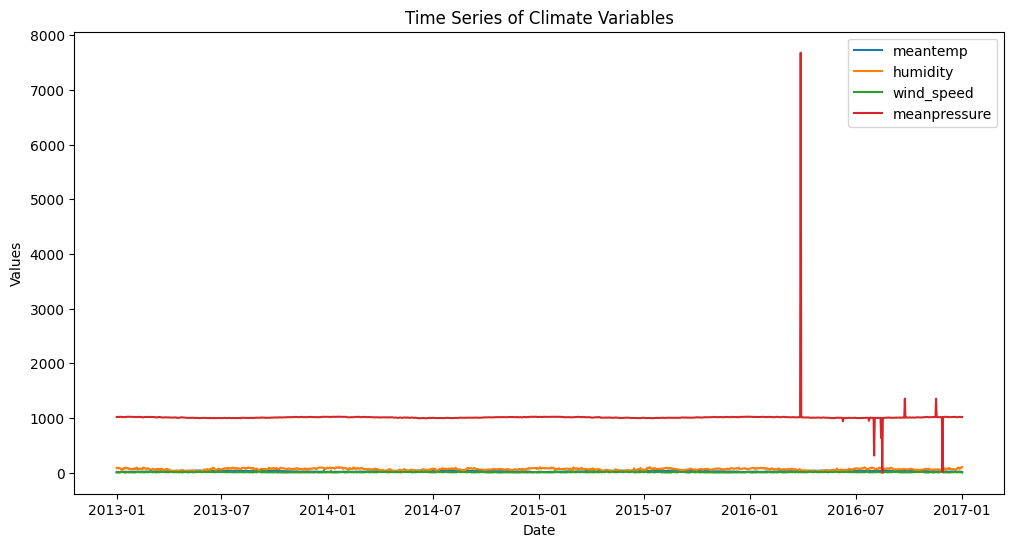

In [35]:
plt.figure(figsize=(12,6))
for column in ['meantemp','humidity','wind_speed','meanpressure']:
  plt.plot(train_df[column],label=column)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series of Climate Variables")
plt.legend()
plt.show()

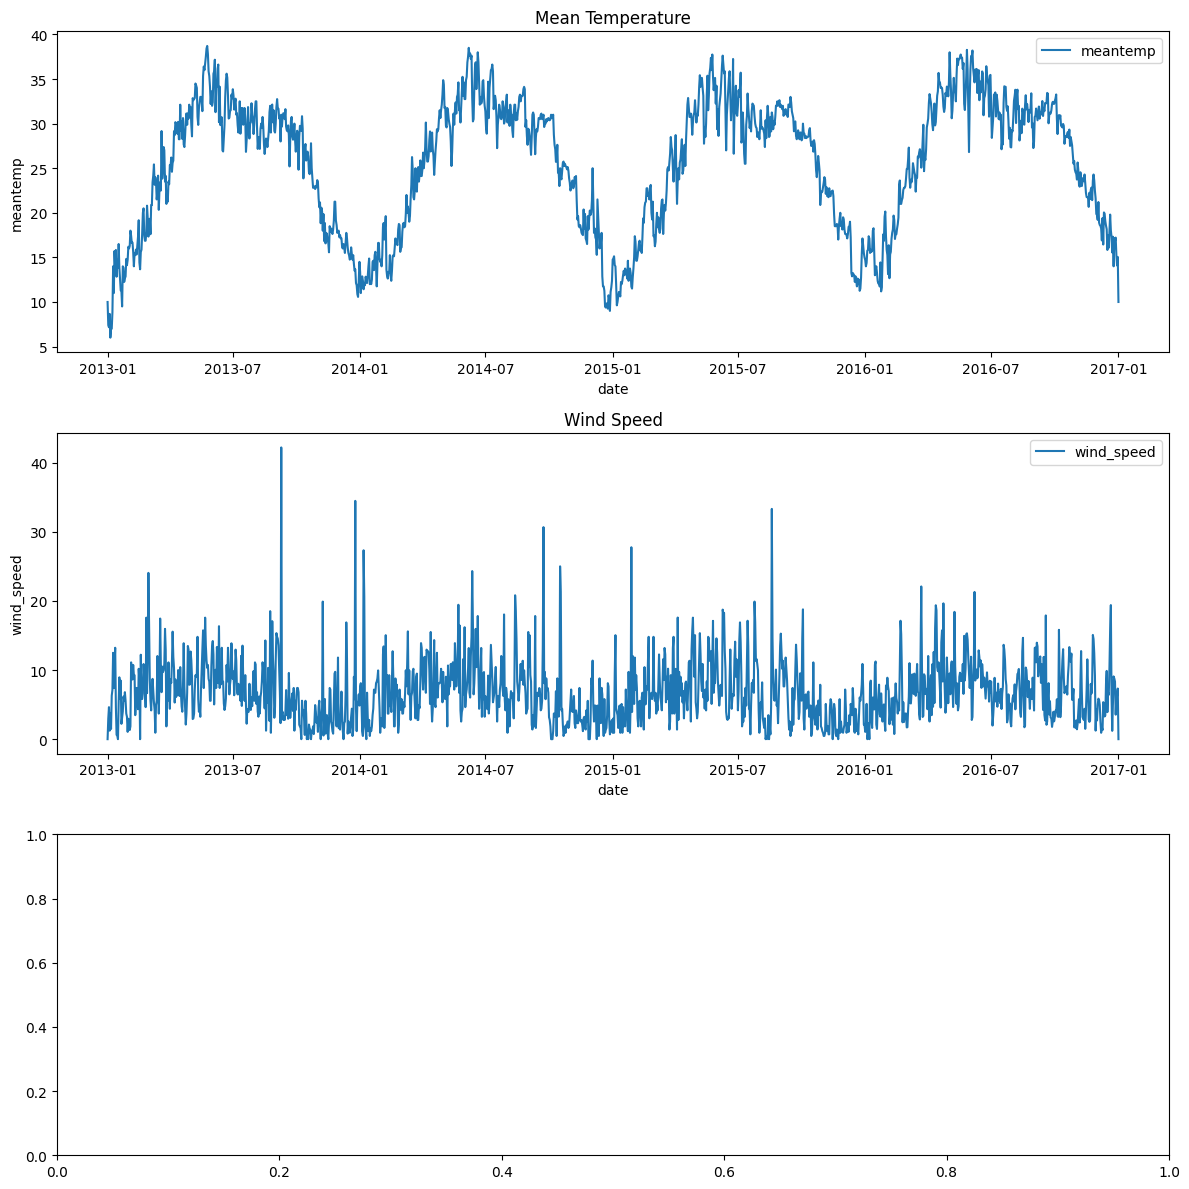

In [41]:
fig, axes = plt.subplots(3,1, figsize=(12,12))
columns = ['meantemp', 'wind_speed']
titles = ['Mean Temperature', 'Wind Speed']

for i, col in enumerate(columns):
  sns.lineplot(ax=axes[i], x=train_df.index, y=train_df[col], label=col)
  axes[i].set_title(titles[i])
plt.tight_layout()
plt.show()

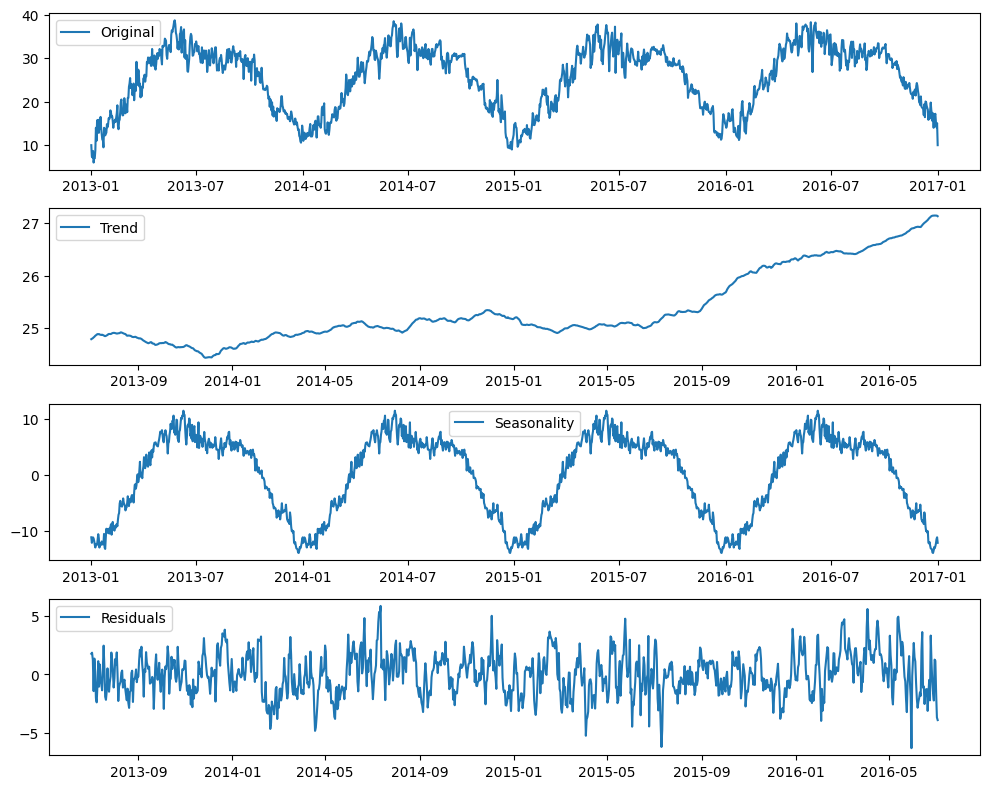

In [42]:
decomposed = seasonal_decompose(train_df['meantemp'], model='additive', period=365)

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(train_df['meantemp'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposed.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposed.seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(decomposed.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
from statsmodels.tsa.forecasting.stl import STLForecast
train, test = train_test_split(train_df['meantemp'], test_size=0.2, shuffle=False)

stl_forecast = STLForecast(train, ARIMA, model_kwargs={"order": (1, 1, 1)})
model = stl_forecast.fit()
predictions = model.forecast(len(test))
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 6.95816578506543
Root Mean Squared Error (RMSE): 7.783465088363324


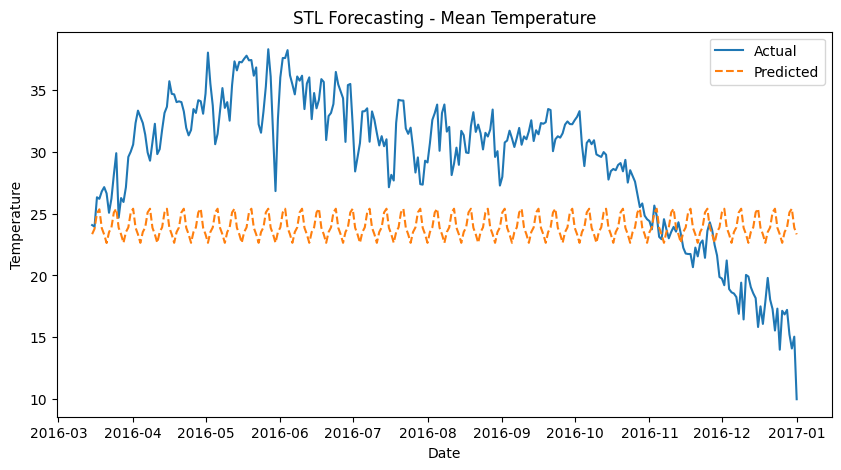

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, predictions, label="Predicted", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("STL Forecasting - Mean Temperature")
plt.legend()
plt.show()